<a href="https://colab.research.google.com/github/eugeinga/CODER-DataScienceIII/blob/main/proyecto_final_ingaramo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE III: NLP, Deep learning y Redes Neuronales Básicas**


![Portada](https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-BannerCODER.jpg)

* **Comisión:** 74560
* **Profesor:** Ezequiel Juan Bassano
* **Tutor:** Federico Gravina
* **Estudiante:** [Eugenia Ingaramo](https://www.linkedin.com/in/eugeniaingaramo/)

# **PROYECTO FINAL: Análisis de reseñas sobre tiendas online de ropa para mujer**

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>0 - CONTENIDO DEL PROYECTO </b></div>

<div class="toc">
  <ul>
    <li>1 - INTRODUCCIÓN</li>
    <li>2 - OBJETIVOS e HIPÓTESIS</li>
    <li>3 - EL SET DE DATOS</li>
    <li>4 - PRE-PROCESAMIENTO DE DATOS
    <ul>
      <li>Librerías a utilizar</li>
      <li>Carga de Datos</li>
      <li>Data Wrangling
        <ul>
          <li>Valores Duplicados</li>
          <li>Valores Faltantes</li>
          <li>Transformación de datos</li>
        </ul>
      </li>
      <li>Limpieza de texto</li>
      <ul>
          <li>Normalización</li>
          <li>Signos de Puntuación</li>
          <li>Tokenización</li>
          <li>Stopwords</li>
          <li>Steming</li>
          <li>Lematización</li>
        </ul>
    </ul>
    </li>
    <li>5 - ANÁLISIS EXPLORATORIO DE DATOS (EDA)
      <ul>
        <li>Frecuencia de las palabras y n-gramas</li>
        <li>Nubes de palabras</li>
        <li>Distribución de longitudes por clase</li>
        <li>Palabras distintivas en cada clase</li>        
      </ul>          
    <li>6 - FEATURE ENGINEERING
      <ul>
        <li>Feature Creation - Generación de Variables</li>
        <li>Feature Binning - Agrupación de Características</li>
        <li>Transformación de Datos (Normalización) 🔴</li>
        <li>Escalado (Estandarización de los Datos) 🟡</li>  
      </ul>
    <li>CONCLUSIÓN</li>
    <li>REFERENCIAS</li>
  </ul>
</div>


<a id="1" href="#introduccion"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>1 - INTRODUCCION </b></div>

![Datset Cover](https://github.com/eugeinga/CODER-DataScienceIII/raw/main/IMG-Indumentaria.jpg)

En el competitivo mundo del e-commerce de indumentaria femenina, entender las opiniones de las clientas es clave para mejorar la experiencia de compra, optimizar el catálogo de productos y aumentar la fidelización. Sin embargo, las reseñas suelen estar en formato texto no estructurado, lo que dificulta su análisis masivo.
Este proyecto busca transformar estas reseñas en información valiosa, identificando patrones de satisfacción e insatisfacción y construyendo un modelo que permita clasificar automáticamente las opiniones como positivas o negativas.

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>2 - OBJETIVO e HIPÓTESIS </b></div>

El presente trabajo tiene por objeto analizar y modelar reseñas de indumentaria femenina para:

* Aplicar técnicas de Procesamiento de Lenguaje Natural (NLP) que permitan extraer insights relevantes.

* Desarrollar un modelo de clasificación supervisado que prediga la polaridad de una reseña (positiva/negativa) a partir de su texto.

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>3 - EL SET DE DATOS </b></div>

### **◼️ ORIGEN DE LOS DATOS**
----

**Women’s Clothing E-Commerce Reviews**, disponible públicamente en Kaggle:
<https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews>

Este es un conjunto de datos de comercio electrónico de ropa femenina que gira en torno a las reseñas escritas por los clientes.

### **◼️ VARIABLES**
----
Este conjunto de datos incluye 23.486 filas y 10 variables de características. Cada fila corresponde a una reseña de un cliente e incluye las siguientes variables:

* **ID de la prenda:** variable categórica entera que hace referencia a la prenda específica que se reseña.
* **Edad:** variable entera positiva que indica la edad del reseñador.
* **Título:** Variable de cadena para el título de la reseña.
* **Texto de la reseña:** Variable de cadena para el cuerpo de la reseña.
* **Calificación:** Variable entera ordinal positiva para la puntuación del producto otorgada por el cliente, desde 1 (peor) hasta 5 (mejor).
* **IND recomendado:** Variable binaria que indica si el cliente recomienda el producto, donde 1 significa recomendado y 0 no recomendado.
* **Recuento de comentarios positivos:** Número entero positivo que documenta el número de otros clientes que consideraron positiva esta reseña.
* **Nombre de la división:** Nombre categórico de la división de alto nivel del producto.
* **Nombre del departamento:** Nombre categórico del departamento del producto.
* **Nombre de la clase:** Nombre categórico de la clase del producto.


Para la clasificación se crea una variable binaria objetivo "Sentiment":
* 1 (Positivo) = Rating 4 o 5.
* 0 (Negativo) = Rating 1 o 2.

Se excluirán las reseñas con rating 3 (neutral).

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>4 - PRE-PROCESAMIENTO DE DATOS </b></div>

### **◼️ LIBRERÍAS A UTILIZAR**
----

In [135]:
import pandas as pd                                           # manejo de datos
import numpy as np                                            # manejo de arreglos
import missingno as msno                                      # visualización de datos faltantes
import re                                                     # Para trabajar con expresiones regulares
import chardet                                                # Para identificar el encoding del archivo de datos
import requests                                               # Para salvar limitaciones de acceso a internet del entorno de ejecución

import nltk                                                   # Biblioteca para procesamiento de lenguaje natural - NATURAL LANGUAGE TOOLKIT
nltk.download('punkt')                                        # Descarga el paquete de tokenización de NLTK
nltk.download('punkt_tab')                                    # Descarga el paquete de tokenización de NLTK
nltk.download('stopwords')                                    # Descarga el paquete de stopwords de NLTK
nltk.download('wordnet')                                      # Descarga el paquete de WordNet de NLTK (base de datos léxica para lematización en inglés)
from nltk.corpus import stopwords                             # Para acceder a listas de palabras vacías (stopwords) en distintos idiomas
from nltk.tokenize import word_tokenize                       # Desde el módulo tokenize de NLTK, se importa sólo la función word_tokenize
from nltk.stem import PorterStemmer                           # Desde el módulo stem de NLTK, se importa sólo la función PorterStemmer
from nltk.stem import WordNetLemmatizer                       # Desde el módulo stem de NLTK, se importa sólo la función WordNetLemmatizer

from wordcloud import WordCloud                               # Para trabajar con nubes de palabras
from textblob import TextBlob                                 # Para análisis de sentimientos

from sklearn.feature_extraction.text import CountVectorizer   # Para convertir texto en vectores/matrices de frecuencia (BOW: Bag Of Words)
from sklearn.feature_extraction.text import TfidfVectorizer   # Para generar frecuencias TF-IDF

import matplotlib.pyplot as plt                               # Para crear gráficos y visualizaciones

import warnings                                               # Para tratamiento de errores/alertas

#import seaborn as sns                               # visualización de gráficos
#from seaborn import lmplot
#import matplotlib.pyplot as plt                     # visualización de gráficos
##import matplotlib.style as style

#from sklearn.preprocessing import LabelEncoder      # conversión de variables categóricas
#from sklearn.preprocessing import StandardScaler    # escalado de datos
#from sklearn.preprocessing import RobustScaler      # escalado de datos

#import scipy.stats as stats                         # análisis estadístico
#from scipy.stats import shapiro                     # Test estadístico de Normalidad

#import statsmodels.api as sm                        # Gráfico QQ-Plot
#from statsmodels.regression.linear_model import OLS # para análisis de multicolinealidad (VIF)
#from statsmodels.tools.tools import add_constant    # para análisis de multicolinealidad (VIF)

# Librerías de modelado de datos
#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor  # Random Forest
#from sklearn.linear_model import LogisticRegression # Regresión Logística
#from sklearn.svm import SVC                         # Support Vector Machine (SVM) para Clasificación
#from sklearn.neighbors import KNeighborsRegressor   # K-Nearest Neighbor (KNN)
#from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
#from sklearn.inspection import permutation_importance

#import statsmodels.api as sm
#from statsmodels.miscmodels.ordinal_model import OrderedModel # Regresión Logística Ordinal

#sns.set_theme(style="whitegrid", palette="pastel") # Estilo de seaborn
#custom_palette = {
#    0: '#ffb482',  # Tipo de vino: RED (type=0) Color Naranja
#    1: '#a1c9f4',  # Tipo de vino: WHITE (type=1) Color Azul
#    'red': '#ffb482',  # Tipo de vino: RED (type=0) Color Naranja
#    'white': '#a1c9f4'  # Tipo de vino: WHITE (type=1) Color Azul
#}

#sns.color_palette("pastel")
#sns.color_palette("pastel").as_hex()
#sns.color_palette(palette='pastel', as_cmap=True)


#warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **◼️ CARGA DE DATOS**
----

Como primera medida, se detecta el encoding del archivo a utilizar con la librería "chardet"

In [36]:
url = "https://raw.githubusercontent.com/eugeinga/CODER-DataScienceIII/main/Womens%20Clothing%20E-Commerce%20Reviews.csv" # Descarga el contenido del archivo desde la URL
response = requests.get(url)
result = chardet.detect(response.content[:10000])                                                                         # Detecta el encoding usando chardet
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Aunque chardet detectó 'ascii' con alta confianza, ese encoding no es suficiente para leer correctamente el archivo, posiblemente caracteres especiales (como acentos) que no están en el conjunto ASCII. Por lo tanto, haré uso de ISO-8859-1.

In [37]:
# Lectura del dataset con encoding='ISO-8859-1' para evitar errores de lectura cuando el archivo contiene caracteres especiales que no están en ASCII o UTF-8.

url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceIII/refs/heads/main/Womens%20Clothing%20E-Commerce%20Reviews.csv"
df=pd.read_csv(url,sep=',',header=0, encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### **◼️ DATA WRANGLING**
---




El **Data Wrangling** consiste en limpiar, transformar y estructurar los datos para que sean más utilizables y valiosos. Este proceso es esencial porque los datos en su forma original a menudo están desordenados, incompletos o contienen errores que pueden afectar la calidad del análisis.

Como parte de esta etapa se procederá a:
- Identificar valores duplicados
- Identificar valores faltantes
- Transformar datos (normalización, estandarización, etc.).

En este caso se trabaja con un único dataset por lo que no será necesario combinar/concatenar ficheros.

In [38]:
# Información de resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


El dataset bajo estudio cuenta con 23486 filas y 10 columnas de las cuales 9 corresponden a variables independientes a analizar y 1 a la variable dependiente u objetivo.

In [39]:
# Cardinalidad de las variables

cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)}).round(2)
cardinalidad

,Cantidad,Porcentaje
Unnamed: 0,23486,100.00
Clothing ID,1206,5.13
Age,77,0.33
Title,13993,59.58
Review Text,22634,96.37
Rating,5,0.02
Recommended IND,2,0.01
Positive Feedback Count,82,0.35
Division Name,3,0.01
Department Name,6,0.03


#### **◾ VALORES DUPLICADOS**

##### Se identifican y remueven de los registros duplicados

In [40]:
print("Dimensiones del dataset original: ", df.shape)
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
print("Dimensiones del dataset sin filas duplicadas: ", df.shape)

Dimensiones del dataset original:  (23486, 11)
Dimensiones del dataset sin filas duplicadas:  (23486, 11)


El dataset no tiene registros duplicadas que eliminar.

#### **◾ VALORES FALTANTES**

Se identifican los valores nulos en cada una de las columnas del dataset.

In [41]:
# Contabilizo los datos nulos/faltantes por columna.

pd.DataFrame({'Cant.NAN' : df.isna().sum(), '%NAN' : df.isna().sum() / len(df) * (100)}).round(2)

,Cant.NAN,%NAN
Unnamed: 0,0,0.00
Clothing ID,0,0.00
Age,0,0.00
Title,3810,16.22
Review Text,845,3.60
Rating,0,0.00
Recommended IND,0,0.00
Positive Feedback Count,0,0.00
Division Name,14,0.06
Department Name,14,0.06


<Axes: >

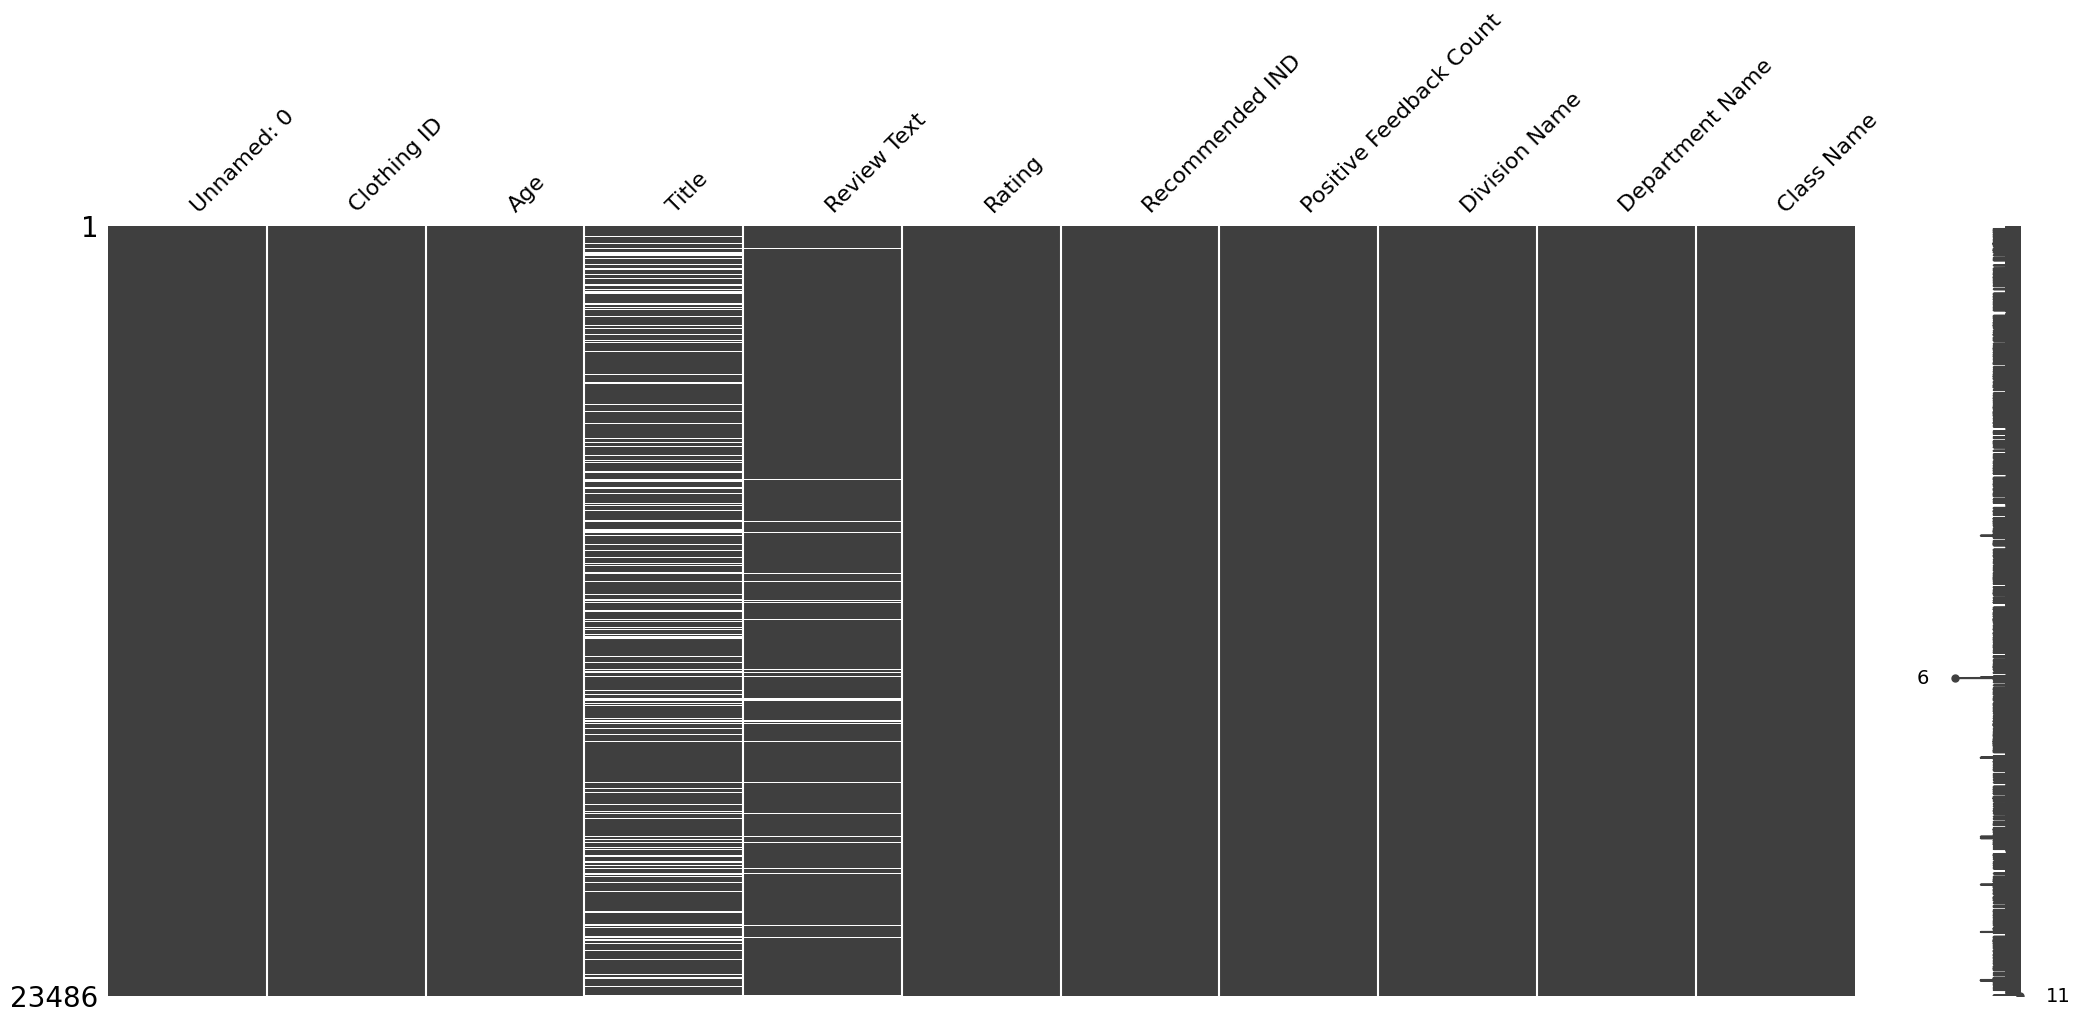

In [42]:
msno.matrix(df)

Se eliminan los registros donde el campo "Review Text" sea nulo dado que no aportan valor al análisis a realizar.

In [43]:
print("Dimensiones del dataset antes de la remoción de valores faltantes: ", df.shape)
df.dropna(subset=['Review Text'], inplace=True)
print("Dimensiones del dataset sin valores faltantes en 'Review Text': ", df.shape)

Dimensiones del dataset antes de la remoción de valores faltantes:  (23486, 11)
Dimensiones del dataset sin valores faltantes en 'Review Text':  (22641, 11)


Se determina la longitud mínima, máxima y promedio de la variable "Review Text":

In [44]:
df["review_length"] = df["Review Text"].apply(len)
#df["review_length"] = df["Review Text"].fillna("").apply(len)

max_length = df["review_length"].max()
min_length = df["review_length"].min()
avg_length = df["review_length"].mean()

print(f"Longitud máxima de reseñas: {max_length}")
print(f"Longitud mínima de reseñas: {min_length}")
print(f"Longitud promedio de reseñas: {avg_length:.2f}")

Longitud máxima de reseñas: 508
Longitud mínima de reseñas: 9
Longitud promedio de reseñas: 308.69


#### **◾ TRANSFORMACIÓN DE DATOS**

Como parte del proceso de transformación de datos se crea la variable binaria "Sentiment" a partir de la variable "Rating" asumiendo ratings 4 y 5 como positivos, 1 y 2 como negativos, descartando ratings 3.

In [106]:
df = df[df['Rating'] != 3].copy()
df['Sentiment'] = np.where(df['Rating'] >= 4, "Positivo", "Negativo")
df['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
Positivo,0.880412
Negativo,0.119588


### **◼️ LIMPIEZA DEL TEXTO**


#### **◾ NORMALIZACIÓN**

Se **normalizan** los valores pasando todo el texto a minúscula:

In [46]:
df['Review_lower'] = df['Review Text'].apply(lambda text: text.lower())

#### **◾ SIGNOS DE PUNTUACIÓN**

Se eliminan **signos de puntuación**:

In [47]:
def remove_punctuation(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)                          # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico

df['Review_puntuacion'] = df['Review_lower'].apply(remove_punctuation)  # Aplicar la función a la columna 'review_lower'

#### **◾ TOKENIZACIÓN**

Se **tokenizan** los valores de la columna "Review Text" para dividir el texto en unidades pequeñas (tokens) a fin de poder trabajar con cada palabra por separado (contar frecuencias, aplicar modelos, buscar significados, etc.)


In [48]:
df['Review_tokenizado'] = df['Review_puntuacion'].apply(word_tokenize)

#### **◾ STOPWORDS**

Se remueven **stopwords**, aquellas  palabras vacías que no aportan un valor significativo al análisis del texto (ej.: artículos, preposiciones, conjunciones y otros términos comunes que suelen ser irrelevantes para tareas de procesamiento de texto) y así mejorar la precisión en el análisis de sentimientos, clasificación de texto y búsqueda de información.

In [49]:
stopwords_eng = stopwords.words('english')    # Para obtener el listado de stopwords en inglés dado que las reseñas están en ese idioma
print(stopwords_eng[:20])                     # Se muestran las primeras 20 stopwords

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [50]:
#stop_words = set(stopwords.words('english'))  # Se crea una lista de stopwords en inglés usando NLTK
stop_words = list(stopwords.words('english'))  # Se crea una lista de stopwords en inglés usando NLTK

# Se define una función lamda para eliminar stopwords en cada fila de la columna 'Review_tokenizado'
df['Review_tokenizado_sin_stopwords'] = df['Review_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

A fin de reducir la variabilidad de las palabras y facilitando el análisis del texto se procede a realizar el steming y lematización de las palabras del campo "Rreview Text"

#### **◾ STEMMING**

Se realiza el **stemming** de las palabras para reducirlas a su raíz o forma base eliminando los sufijos de cada palabra.

In [51]:
stemmer = PorterStemmer()   # Se inicializa el stemmer
df['Review_stemming'] = df['Review_tokenizado_sin_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])  # Se aplica stemming a la columna 'Review_tokenizado_sin_stopwords'

#### **◾ LEMATIZACIÓN**

Se realiza la **lematización** de las palabras a fin de reducirlas a su lema (forma base), manteniendo el significado gramatical correcto de las palabras.

In [52]:
lemmatizer = WordNetLemmatizer()  # Se inicializa el lematizador
df['Review_lematizacion'] = df['Review_tokenizado_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]) # Se aplica la lematización a la columna 'Review_tokenizado_sin_stopwords'

Se previsualizan las columnas generadas como parte del proceso de limpieza del texto:

In [53]:
pd.set_option('display.max_colwidth', None) # Para configurar pandas para mostrar el contenido completo de las columnas
df[["Review Text", "Review_lower", "Review_puntuacion", "Review_tokenizado", "Review_tokenizado_sin_stopwords", "Review_stemming", "Review_lematizacion"]].head(5)

,Review Text,Review_lower,Review_puntuacion,Review_tokenizado,Review_tokenizado_sin_stopwords,Review_stemming,Review_lematizacion
0,Absolutely wonderful - silky and sexy and comfortable,absolutely wonderful - silky and sexy and comfortable,absolutely wonderful silky and sexy and comfortable,"[absolutely, wonderful, silky, and, sexy, and, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]","[absolut, wonder, silki, sexi, comfort]","[absolutely, wonderful, silky, sexy, comfortable]"
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.","love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",love this dress its sooo pretty i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite i bought a petite and am 58 i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite,"[love, this, dress, its, sooo, pretty, i, happened, to, find, it, in, a, store, and, im, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, its, petite, i, bought, a, petite, and, am, 58, i, love, the, length, on, me, hits, just, a, little, below, the, knee, would, definitely, be, a, true, midi, on, someone, who, is, truly, petite]","[love, dress, sooo, pretty, happened, find, store, im, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 58, love, length, hits, little, knee, would, definitely, true, midi, someone, truly, petite]","[love, dress, sooo, pretti, happen, find, store, im, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 58, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]","[love, dress, sooo, pretty, happened, find, store, im, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 58, love, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]"
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!","i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments,"[i, love, love, love, this, jumpsuit, its, fun, flirty, and, fabulous, every, time, i, wear, it, i, get, nothing, but, great, compliments]","[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliments]","[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]","[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,"[this, shirt, is, very, flattering, to, all, due, to, the, adjustable, front, tie, it, is, the, perfect, length, to, wear, with, leggings, and, it, is, sleeveless, so, it, pairs, well, with, any, cardigan, love, 

In [54]:
pd.reset_option('display.max_colwidth')     # Restaura la configuración predeterminada de pandas para el ancho de las columnas

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>5 - ANÁLISIS EXPLORATORIO DE DATOS </b></div>

Se realiza un **Análisis Exploratorio de Datos** específico para NLP.

Como parte de esta etapa se procederá a:
- Analizar la frecuencia de las palabras y n-gramas.
- Generar nubes de palabras.
- Identificar la distribución de longitudes por clase.
- Identificar palabras distintivas en cada clase.

### **◼️ FRECUENCIA DE PALABRAS**
----

Se obtiene el listado de las palabras con mayor frecuencia:

In [69]:
from collections import Counter

tokens_lematizados = [token for tokens_list in df['Review_lematizacion'] for token in tokens_list]  # Se unen todos los tokens lematizados en una sola lista
frecuencia_palabras_lematizadas = Counter(tokens_lematizados)                                       # Se contabiliza la frecuencia de aparición de cada palabra
frecuencia_palabras_lematizadas.most_common(20)                                                     # Se muestran las 20 palabras más frecuentes

[('dress', 9852),
 ('fit', 8920),
 ('size', 8240),
 ('love', 8216),
 ('top', 7030),
 ('color', 6104),
 ('wear', 5904),
 ('like', 5891),
 ('look', 5853),
 ('great', 5646),
 ('im', 5206),
 ('would', 4040),
 ('fabric', 4018),
 ('small', 3898),
 ('perfect', 3592),
 ('little', 3384),
 ('one', 3280),
 ('really', 3278),
 ('ordered', 3256),
 ('flattering', 3152)]

Se grafica la distribución de frecuencia de las palabras más frecuentes para las palabras Lematizadas y las Originales

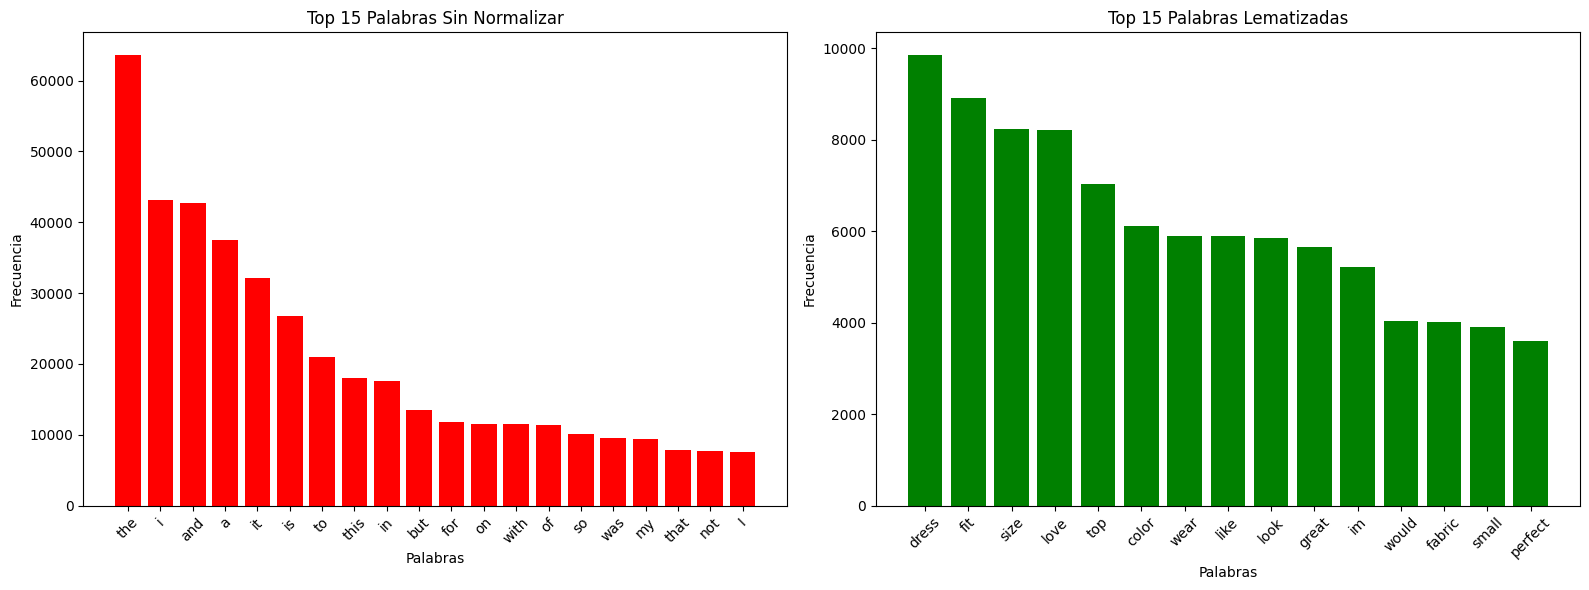

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

tokens_sin_normalizar = [token for review in df['Review Text'] for token in review.split()]   # Tokenización sin normalización previa (sin pasar a minúsculas, sin quitar puntuación)
frecuencia_sin_normalizar = Counter(tokens_sin_normalizar)                                    # Se cuenta la frecuencia de cada palabra
palabras_sin_norm, frecuencias_sin_norm = zip(*frecuencia_sin_normalizar.most_common(20))     # Se obtienen las 15 palabras más comunes y sus frecuencias
# Gráfica de tokenización sin normalización previa (derecha)
axs[0].bar(palabras_sin_norm, frecuencias_sin_norm, color='red')
axs[0].set_title('Top 15 Palabras Sin Normalizar')
axs[0].set_xlabel('Palabras')
axs[0].set_ylabel('Frecuencia')
axs[0].tick_params(axis='x', rotation=45)

palabras_lem, frecuencias_lem = zip(*frecuencia_palabras_lematizadas.most_common(15)) # Se obtienen las 15 palabras más comunes y sus frecuencias
# Gráfica de tokenización sobre el texto lematizado (izquierda)
axs[1].bar(palabras_lem, frecuencias_lem, color='green')
axs[1].set_title('Top 15 Palabras Lematizadas')
axs[1].set_xlabel('Palabras')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=45)


plt.tight_layout()  # Ajusta diseño para evitar superposición
plt.show()


In [137]:
df_positivo = df[df['Sentiment'] == 'Positivo']                                 # Se separa el texto positivo
# Se vectoriza el texto positivo
vectorizador_pos = TfidfVectorizer()
matriz_tfidf_pos = vectorizador_pos.fit_transform(df_positivo['Review Text'])
vocabulario_pos = vectorizador_pos.get_feature_names_out()


df_negativo = df[df['Sentiment'] == 'Negativo']                                 # Se separa el texto positivo
# Se vectoriza el texto negativo
vectorizador_neg = TfidfVectorizer()
matriz_tfidf_neg = vectorizador_neg.fit_transform(df_negativo['Review Text'])
vocabulario_neg = vectorizador_neg.get_feature_names_out()

# Mostrar resultados
print("Vocabulario - Positivo:")
print(vocabulario_pos)
print("\nMatriz TF-IDF - Positivo:")
print(matriz_tfidf_pos.toarray())

print("\n\nVocabulario - Negativo:")
print(vocabulario_neg)
print("\nMatriz TF-IDF - Negativo:")
print(matriz_tfidf_neg.toarray())


Vocabulario - Positivo:
['00' '000' '00p' ... 'zooming' 'zuma' 'â¼ber']

Matriz TF-IDF - Positivo:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Vocabulario - Negativo:
['00' '00p' '0p' ... 'zombie' 'zoolander' 'zoom']

Matriz TF-IDF - Negativo:
[[0.         0.         0.18324737 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### **◼️ NUBE DE PALABRAS Y N-GRAMAS**
----

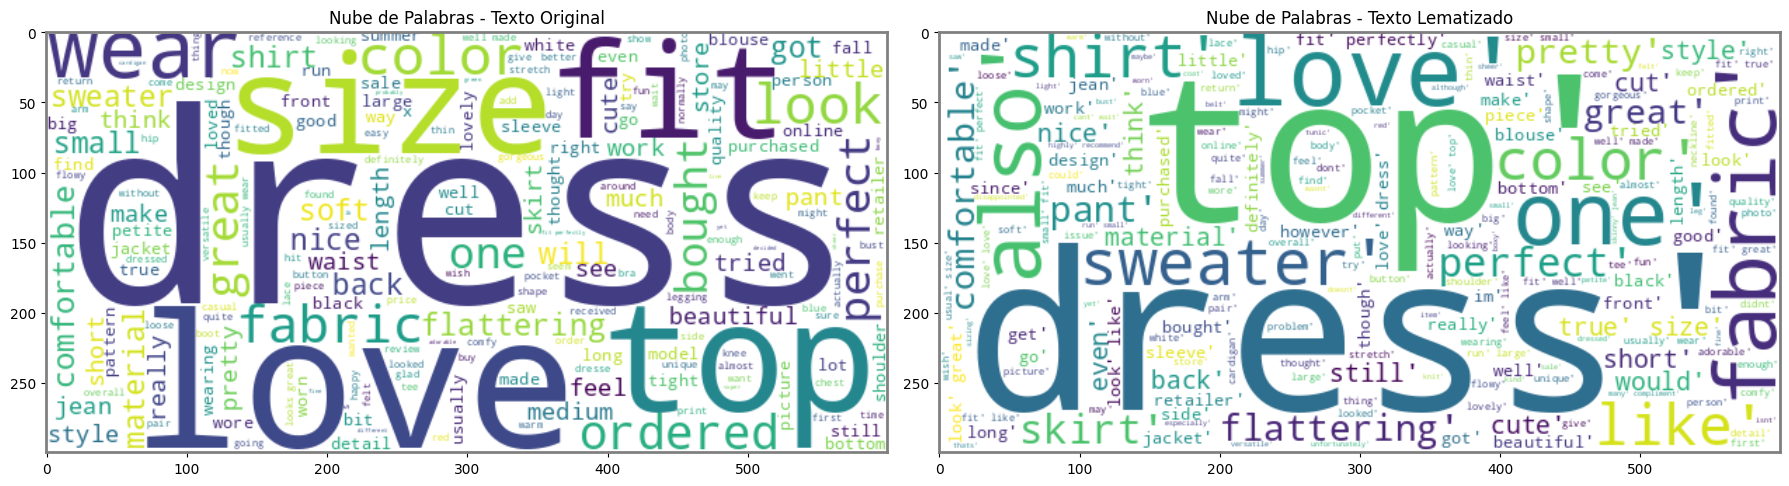

In [92]:
# Se crean subplots de 1 fila, 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

text_original = ' '.join(df['Review Text'].fillna('').astype(str))
wordcloud_original = WordCloud(width=600, height=300, background_color='white').generate(text_original)                             # Se crea la nube de palabras con el texto original
# Se grafica la nube de palabras original
axs[0].imshow(wordcloud_original, interpolation='bilinear')
axs[0].set_title('Nube de Palabras - Texto Original')
#axs[0].axis('off')
for spine in axs[0].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

text_lematizado = ' '.join(df['Review_lematizacion'].fillna('').astype(str))
wordcloud_lematizado = WordCloud(width=600, height=300, background_color='white', stopwords=stop_words).generate(text_lematizado)   # Se crea la nube de palabras con el texto lematizado sin stopwords
# Se grafica la nube de palabras lematizadas
axs[1].imshow(wordcloud_lematizado, interpolation='bilinear')
axs[1].set_title('Nube de Palabras - Texto Lematizado')
#axs[1].axis('off')
for spine in axs[1].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

Se agregan algunas palabras a las stopwords para limpiar la nube de palabras y se vuelve a graficar.

In [115]:
stop_words.extend(['wear','would','one', 'dress', 'pant', 'skit', 'shirt', 'jacket', 'jean', 'sweater', 'legging', 'im']) # Agrega algunas palabras a las stopwords

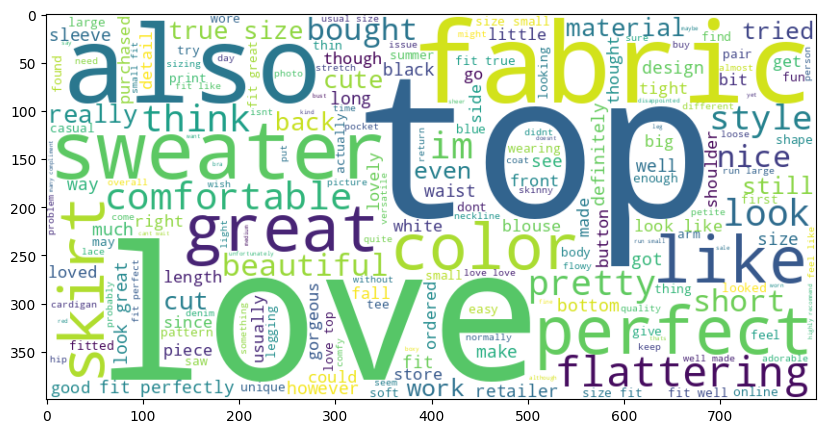

In [111]:
text_lematizado = ' '.join(df['Review_lematizacion'].fillna('').astype(str))  # Se crea una nueva wordcloud con el texto lematizado removiendo stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_lematizado)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
spine.set_edgecolor('gray')
spine.set_linewidth(2)
plt.show()

Se generan nubes de palabras distintas según sea el sentimiento (Sentiment), positivo o negativo.

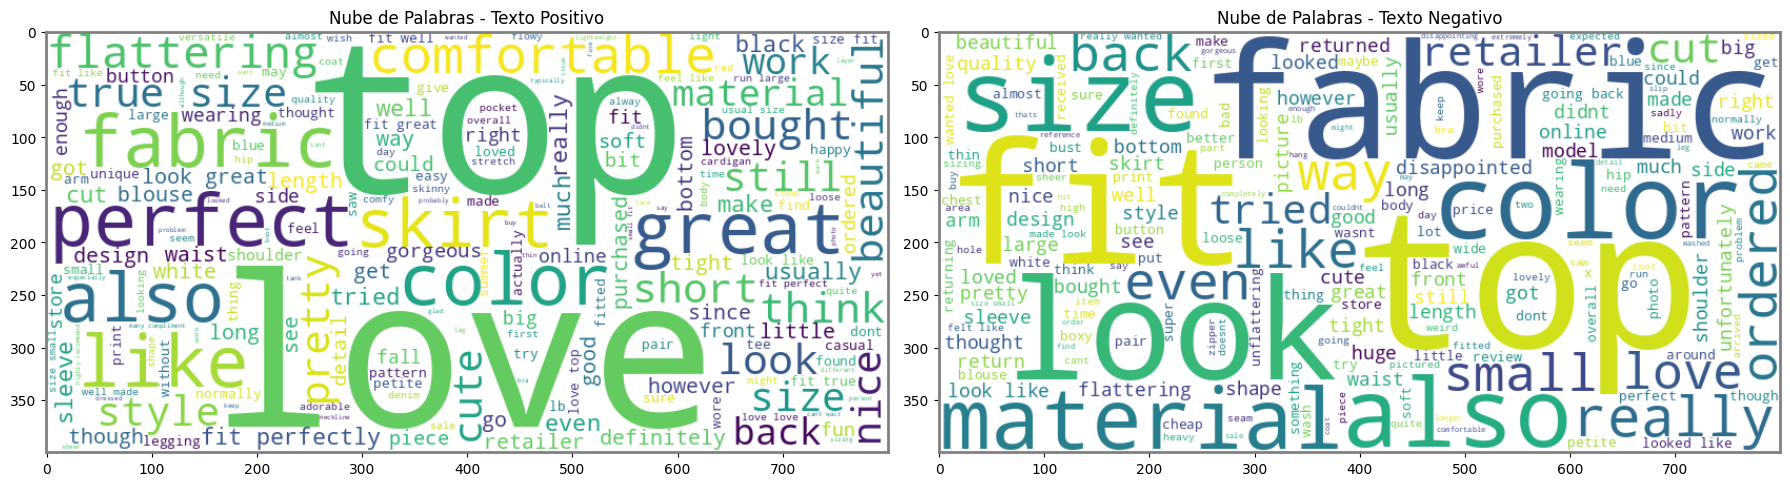

In [116]:
# Se crean subplots de 1 fila, 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

df['Review_lematizacion'] = df['Review_lematizacion'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Se grafica la nube de palabras con sentimientos positivos
df_positivo = df[df['Sentiment'] == 'Positivo']               # Se filtran las filas con sentimiento positivo del DataFrame
text_positivo = ' '.join(df_positivo['Review_lematizacion'])  # Se crea una nueva wordcloud con el texto lematizado
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words).generate(text_positivo)
axs[0].imshow(wordcloud_positivo, interpolation='bilinear')
axs[0].set_title('Nube de Palabras - Texto Positivo')
for spine in axs[0].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

# Se grafica la nube de palabras con sentimientos negativos
df_negativo = df[df['Sentiment'] == 'Negativo']               # Se filtran las filas con sentimiento negativo del DataFrame
text_negativo = ' '.join(df_negativo['Review_lematizacion'])  # Se crea una nueva wordcloud con el texto lematizado
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white',stopwords=stop_words).generate(text_negativo)
axs[1].imshow(wordcloud_negativo, interpolation='bilinear')
axs[1].set_title('Nube de Palabras - Texto Negativo')
#axs[1].axis('off')
for spine in axs[1].spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(2)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

#### **◼️ BAG OF WORDS (BOW)**
----

A continuación se crean nubes de palabras en contexto positivo y negativo con n-gramas para captar contexto y matices que no se verían con palabras individuales.

Para esto se utiliza una instancia de CountVectorizer (que convierte una colección de textos en una matriz de recuentos de términos) y luego ajustamos esta instancia (mediante fit_transform) al texto de cada reseña. Esto construye el vocabulario y transforma las reseñas en una matriz BoW (freqs).

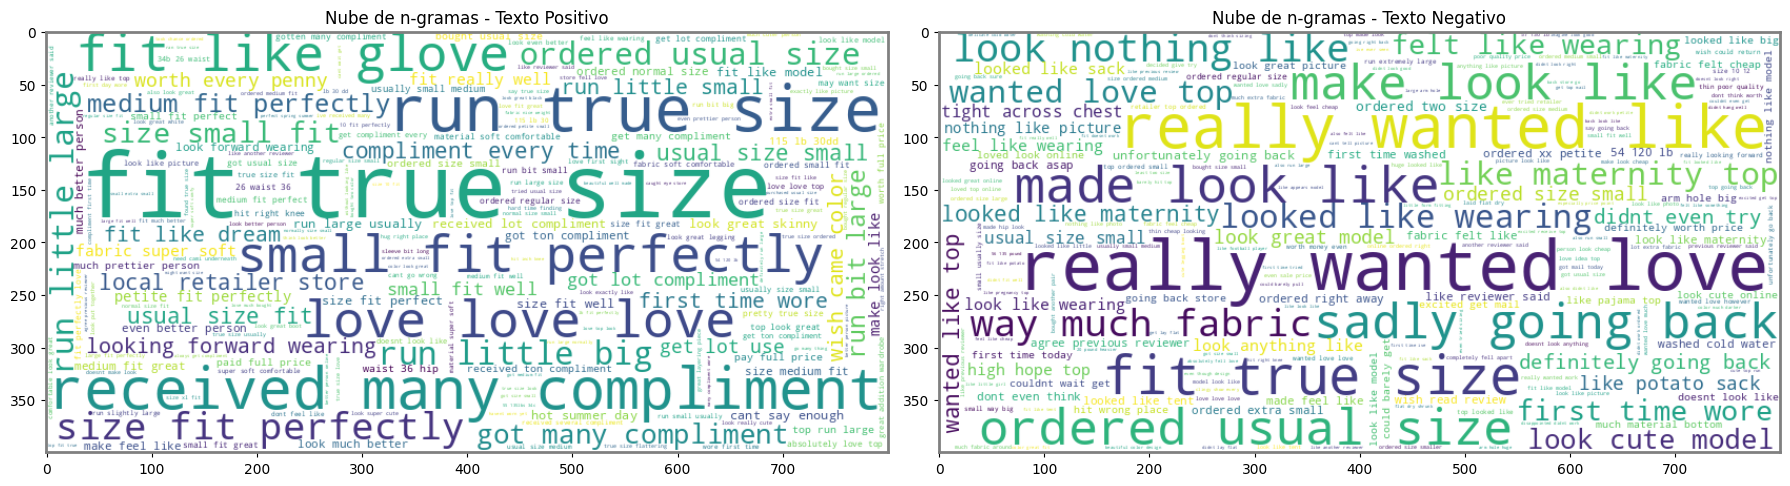

In [134]:
df['Review_lematizacion'] = df['Review_lematizacion'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)  #Para convertir listas en strings si es necesario

# Función para generar n-gramas
def generate_ngrams(texts, n=3):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=stop_words)           # Se crea el CountVectorizer con las stop_words definidas
    X = vectorizer.fit_transform(texts)                                               # Se transforma el texto en n-gramas
    freqs = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))  # Se crea el diccionario con los n-gramas y sus frecuencias
    return freqs                                                                      # Se devuelve la matriz BOW (el diccionario con los n-gramas y sus frecuencias)

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Nube de n-gramas para textos positivos
ngrams_positivo = generate_ngrams(df[df['Sentiment'] == 'Positivo']['Review_lematizacion'], n=3)
wordcloud_positivo = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_positivo)
axs[0].imshow(wordcloud_positivo, interpolation='bilinear')
axs[0].set_title('Nube de n-gramas - Texto Positivo')

# Nube de n-gramas para textos negativos
ngrams_negativo = generate_ngrams(df[df['Sentiment'] == 'Negativo']['Review_lematizacion'], n=3)
wordcloud_negativo = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngrams_negativo)
axs[1].imshow(wordcloud_negativo, interpolation='bilinear')
axs[1].set_title('Nube de n-gramas - Texto Negativo')

# Estética
for ax in axs:
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(2)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


Las reseñas positivas están centradas en experiencias satisfactorias y elogios. No obstante, y como era de esperar, en las reseñas negativas hay una clara expresión de decepción ("really wanted like", "sadly going back") y se perciben problemas de expectativa vs. realidad ("look nothing like", "made look like").

### **◼️ ANÁLISIS DE SENTIMIENTOS**
----

Se evaluan las reseñas en cuanto a su polaridad y su subjetividad:
* La polaridad mide cuán positivo o negativo es el texto, en un rango de -1 (muy negativo) a 1 (muy positivo).
* La subjetividad mide cuánto del texto es opinión (1) versus hecho (0).

In [124]:
# Se crea una columna con objetos TextBlob sobre la que se hará el análisis de sentimiento
df['Blob'] = df['Review Text'].apply(TextBlob)

# Se extraen la polaridad y subjetividad del sentimiento
df['Sentiment_Polarity'] = df['Blob'].apply(lambda blob: blob.sentiment.polarity)
df['Sentiment_Subjectivity'] = df['Blob'].apply(lambda blob: blob.sentiment.subjectivity)
df[['Review Text', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head(10)

,Review Text,Sentiment_Polarity,Sentiment_Subjectivity
0,Absolutely wonderful - silky and sexy and comf...,0.633333,0.933333
1,Love this dress! it's sooo pretty. i happene...,0.339583,0.725000
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,0.625000
4,This shirt is very flattering to all due to th...,0.512891,0.568750
5,"I love tracy reese dresses, but this one is no...",0.178750,0.533125
6,I aded this in my basket at hte last mintue to...,0.133750,0.607778
7,"I ordered this in carbon for store pick up, an...",0.171635,0.496154
8,I love this dress. i usually get an xs but it ...,0.002500,0.380000
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",0.204200,0.467257
11,This dress is perfection! so pretty and flatte...,0.250000,1.000000


In [126]:
sentiment_stats = df.groupby('Sentiment')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean()  # Se agrupa por sentimiento y calculan promedios

print("Promedio de polaridad y subjetividad por tipo de sentimiento:")
print(sentiment_stats)

Promedio de polaridad y subjetividad por tipo de sentimiento:
           Sentiment_Polarity  Sentiment_Subjectivity
Sentiment                                            
Negativo             0.108145                0.532102
Positivo             0.282438                0.568374


Los textos clasificados como positivos tienen una **polaridad** levemente mayor que los negativos. No obstante, los textos negativos no son extremadamente negativos (0.108), lo que podría indicar que las reseñas negativas, aunque críticas, no necesariamente usan lenguaje extremadamente negativo

Ambos tipos de reseñas tienen niveles similares de **subjetividad**, aunque las positivas son ligeramente más subjetivas. Esto sugiere que los usuarios tienden a expresar más emociones o juicios personales cuando están satisfechos.

### **◼️ PALABRAS DISTINTIVAS EN CADA CLASE**
----

<a id="1"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>6 - MODELADO </b></div>

Se consideran las siguientes variables independientes para la clasificación de la calidad ('quality') de los vinos:
* citric acid
* pH
* total acidity
* prop sulful
* ajust density
* sweetness
* sulphate index

In [ ]:
# Se seleccionan las características a considerar

features = ['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']

### **◼️ ALGORITMO 1: Regresión Logística Multinomial**
----

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
# X = df.drop(['quality'],axis=1)  # Para seleccionar todas las categorías (a excepción de quality)
X = df[features]  # Variables independientes (predictoras)
y = df['gama']    # Variable objetivo (categórica)

# Aseguro que la variable objetivo sea categórica
#y = y.astype('gama')
y.dtype

In [ ]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea y entrena el modelo de regresión logística multinomial
model_RLM = LogisticRegression(solver='lbfgs', max_iter=1000) # por defecto multi_class='multinomial'
model_RLM.fit(X_train, y_train)

# Se utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba
y_pred = model_RLM.predict(X_test)

# Se evalua el rendimiento del modelo
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nMatrix de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))

**VALIDACIÓN CRUZADA**

https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gamaNro']

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Se crea el pipeline

modelo = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de los datos
    ('features', LogisticRegression(solver='lbfgs', max_iter=200))  # Modelo de Regresión Logística Multinomial (por defecto multi_class='multinomial')
])


# Se realiza la Validación Cruzada y evalúa el rendimiento del modelo

scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')

print("Accuracy scores for each fold: ", scores)
print("Mean accuracy: ", scores.mean())
print("Standard deviation: ", scores.std())



In [ ]:
hiperparametros = {'features__C': [0.01, 0.1, 1, 10, 100]}  # Diferentes valores de C para probar

grilla=GridSearchCV(modelo, hiperparametros, cv=5,scoring='accuracy')
grilla.fit(X_train,y_train)

In [ ]:
print(grilla.best_params_)

In [ ]:
grilla.cv_results_

In [ ]:
# entrenamos con el mejor modelo
model_RLM=grilla.best_estimator_
model_RLM.fit(X_train, y_train)

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_test = model_RLM.predict(X_test)
y_pred_train = model_RLM.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_RLM = mean_squared_error(y_train,y_pred_train, squared=False) #Si utilizan squared=True en la función mean_squared_error, obtendrán el MSE
#score_test_model_RLM = mean_squared_error(y_test,y_pred_test, squared=False)

score_train_model_RLM = mean_squared_error(y_train,y_pred_train)
score_test_model_RLM = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_RLM))  # Calculo la raiz del MSE dado que no me permite usar el parámetro  squared=True en la función mean_squared_error
print ("Testeo:", np.sqrt(score_test_model_RLM))

El RMSE tiene la misma unidad de medida que la variable objetivo del problema por lo que resulta comparable con el rango de los valores reales.
Cuanto menor sea el valor del RMSE, más precisas serán las predicciones del modelo en relación con los valores reales.

**IMPORTANCIA DE LAS CARACTERÍSTICAS**

La importancia de la permutación es un método para calcular la importancia de las características en el que los valores de cada característica evalúan uno a uno midiendo la disminución resultante en el rendimiento del modelo. Una característica con una alta puntuación de importancia de permutación es aquella que, cuando se baraja, hace que el rendimiento del modelo disminuya significativamente. Esto indica que la característica es importante para las predicciones del modelo.

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_RLM, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
for i, importancia in enumerate(X.columns):
    print(f"Importancia de {importancia}: {importancias[i]:.4f}")

### **◼️ ALGORITMO 2: Support Vector Machine (SVM)**
----

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gama'].cat.codes  # Convertir las etiquetas a códigos numéricos

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea y entrena el modelo de SVM para clasificación ordinal
model_SVM = make_pipeline(StandardScaler(), SVC(kernel='linear'))
model_SVM.fit(X_train, y_train)

# Se utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba
y_pred = model_SVM.predict(X_test)

# Se evalua el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrix de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred, zero_division=1))

**VALIDACIÓN CRUZADA**

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gamaNro']

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Se crea el pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalado de los datos
    ('modelo', SVC())
])

hiperparametros=[{'modelo__C':[1,10],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,10],'modelo__kernel':['rbf']}]
#hiperparametros=[{'modelo__C':[10],'modelo__kernel':['linear']},{'modelo__gamma':[0.01], 'modelo__C':[1],'modelo__kernel':['rbf']}]
grilla=GridSearchCV(pipeline,hiperparametros, cv=3,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(X_train,y_train)

In [ ]:
print(grilla.best_params_)

In [ ]:
grilla.cv_results_

In [ ]:
# Se entrena con el mejor modelo
model_SVM=grilla.best_estimator_
model_SVM.fit(X_train, y_train)

In [ ]:
# Se hacen las predicciones con x_test, x_train
y_pred_test = model_SVM.predict(X_test)
y_pred_train = model_SVM.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_SVM = mean_squared_error(y_train,y_pred_train, squared=False)
#score_test_model_SVM = mean_squared_error(y_test,y_pred_test, squared=False)

score_train_model_SVM = mean_squared_error(y_train,y_pred_train)
score_test_model_SVM = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_SVM))
print ("Testeo:", np.sqrt(score_test_model_SVM))

#Si se utiliza squared=True en la función mean_squared_error, se obtiene el MSE

**IMPORTANCIA DE LAS CARACTERÍSTICAS**

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_SVM, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
for i, importancia in enumerate(X.columns):
    print(f"Importancia de {importancia}: {importancias[i]:.4f}")

### **◼️ ALGORITMO 3: Regresión Logística Ordinal**
----

In [ ]:
# Se seleccionan las variables independientes y la variable objetivo
X = df[['citric acid', 'pH', 'total acidity', 'prop sulful', 'ajust density', 'sweetness', 'sulphate index']]
y = df['gama'].cat.codes  # Convertir las etiquetas a códigos numéricos

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se crea y entrena el modelo de Regresión Logística Ordinal
model_RLO = OrderedModel(y_train, X_train, distr='logit')
result = model_RLO.fit(method='bfgs')

# Se utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba
y_pred = result.predict(X_test).idxmax(axis=1)

# Se evalua el rendimiento del modelo
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nMatrix de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))

Si bien es posible utilizar la clase OrdinalLogisticRegression de la biblioteca statsmodels para validar una Regresión Logística Ordinal, statsmodels no tiene una implementación directa para GridSearchCV, por lo que se necesitaría una solución personalizada que no será desarrollada en esta oportunidad.

### **◼️ ALGORITMO 4: Random Forest**
----

In [ ]:
model_RF = RandomForestRegressor()
hiperparametros={'max_depth':[3,5,7],'min_samples_leaf':[1], 'max_leaf_nodes':[8,10,12], 'n_estimators':[130,150,200]}
grilla=GridSearchCV(model_RF,hiperparametros,cv=3,scoring='neg_root_mean_squared_error', verbose=1)
grilla.fit(X_train,y_train)

#max_depth:         profundidad máxima permitida
#min_samples_leaf:  número mínimo de muestras requeridas en un nodo hoja del árbol.
#max_leaf_nodes:    limita el número máximo de nodos hoja que puede tener un árbol
#n_estimators:      indica la cantidad de árboles

In [ ]:
grilla.best_params_

In [ ]:
grilla.best_score_

In [ ]:
# Se entrena con el mejor modelo

model_RF=grilla.best_estimator_
model_RF.fit(X_train, y_train)

In [ ]:
# Se hacen las predicciones con x_test, x_train

y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_RF = mean_squared_error(y_train,y_pred_train, squared=False)
#score_test_model_RF = mean_squared_error(y_test,y_pred_test, squared=False)

score_train_model_RF = mean_squared_error(y_train,y_pred_train)
score_test_model_RF = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_RF))
print ("Testeo:", np.sqrt(score_test_model_RF))

#Si utilizan squared=True en la función mean_squared_error, obtendrán el MSE

**IMPORTANCIA DE LAS CARACTERÍSTICAS**

El modelo Random Forest en scikit-learn tiene el atributo feature_importances_. Este atributo proporciona la importancia de cada característica en la predicción del modelo.

In [ ]:
# Se calcula la importancia de las variables para el modelo

importancia_predictores = pd.DataFrame(
                            {'predictores': X.columns,
                             'importancia':  model_RF.feature_importances_
                            })

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Se calcula la importancia de las características con otro método. Si bien los coeficientes varían, el orden de importancia se mantiene.

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_RF, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

for i, importancia in enumerate(X.columns):
    print(f"{importancia}: {importancias[i]:.4f}")

### **◼️ ALGORITMO 5: K-Nearest Neighbor (KNN)**
----

In [ ]:
pipeline= Pipeline([('scaler', StandardScaler()),
                  ('modelo',KNeighborsRegressor())])

hiperparametros={'modelo__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}

grilla=GridSearchCV(pipeline,hiperparametros, cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(X_train,y_train)

In [ ]:
grilla.best_params_

In [ ]:
grilla.best_score_

In [ ]:
# Se entrena con el mejor modelo
model_KNN=grilla.best_estimator_
model_KNN.fit(X_train, y_train)

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_test = model_KNN.predict(X_test)
y_pred_train = model_KNN.predict(X_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

#score_train_model_KNN = mean_squared_error(y_train,y_pred_train,squared=False)
#score_test_model_KNN = mean_squared_error(y_test,y_pred_test,squared=False)
score_train_model_KNN = mean_squared_error(y_train,y_pred_train)
score_test_model_KNN = mean_squared_error(y_test,y_pred_test)

print ("Train:", np.sqrt(score_train_model_KNN))  # Calculo la raiz del MSE dado que no me permite usar el parámetro  squared=True en la función mean_squared_error
print ("Testeo:", np.sqrt(score_test_model_KNN))

#Si utilizan squared=True en la función mean_squared_error, obtendrán el MSE

**IMPORTANCIA DE LAS CARACTERÍSTICAS**

In [ ]:
# Se calcula la importancia de las características
resultado = permutation_importance(model_KNN, X_train, y_train, scoring='neg_root_mean_squared_error', random_state=42)
importancias= resultado.importances_mean

# Se muestra la importancia de las características
for i, importancia in enumerate(X.columns):
    print(f"Importancia de {importancia}: {importancias[i]:.4f}")

<a id="1" href="#introduccion"></a>
# <div style="padding:20px;color:yellow;margin:0;font-size:30px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#333333;overflow:hidden"><b>🔲 CONCLUSIÓN </b></div>